In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier, DecisionTreeRegressor

%matplotlib inline

Using TensorFlow backend.


In [2]:
path =os.getcwd()

In [3]:
df =pd.read_csv(path + '/Kickstarter/cleaned_kick_data01.csv')

In [4]:
df.shape

(85233, 17)

In [5]:
df.head(10)

,backers_count,category,country,created_at,currency,deadline,fx_rate,goal,location,pledged,staff_pick,status,duration,created_day,continent,city,state
0,0,film,GB,2017-01-11,GBP,2017-02-15,1.261110,40000.0,"London, UK",0.0,False,failed,35,11,Europe,London,UK
1,12,crafts,CA,2016-02-28,CAD,2016-03-29,0.748587,5000.0,"London, Canada",357.0,False,failed,30,28,America,London,Canada
2,1,games,AU,2016-02-13,AUD,2016-03-19,0.722499,5000.0,"Perth, AU",1.0,False,failed,35,13,Oceania,Perth,AU
3,3,fashion,US,2015-05-25,USD,2015-07-01,1.000000,1900.0,"Austin, TX",49.0,False,failed,37,25,America,Austin,TX
4,2,film,US,2018-05-18,USD,2018-06-17,1.000000,30000.0,"Los Angeles, CA",2.0,False,failed,30,18,America,Los Angeles,CA
5,4,crafts,US,2015-01-20,USD,2015-03-07,1.000000,2500.0,"Indianapolis, IN",185.0,False,failed,46,20,America,Indianapolis,IN
6,26,crafts,US,2017-04-07,USD,2017-05-03,1.000000,1000.0,"Yakima, WA",1125.0,False,successful,26,7,America,Yakima,WA
7,14,art,US,2015-05-26,USD,2015-07-01,1.000000,1500.0,"Gramolazzo, Italy",1500.0,False,successful,36,26,America,Gramolazzo,Italy
8,60,music,GB,2015-04-29,GBP,2015-07-18,1.261110,12000.0,"Watford, UK",4880.0,False,failed,80,29,Europe,Watford,UK
9,2,music,US,2015-11-17,USD,2016-01-01,1.000000,6500.0,"Fond du Lac, WI",50.0,False,failed,45,17,America,Fond du Lac,WI


In [6]:
#对标称属性进行独热编码，转变为数值属性
le =LabelEncoder()

In [7]:
df['backers_count'] =le.fit_transform(df['backers_count'].values)
df['category'] =le.fit_transform(df['category'].values)
df['country'] =le.fit_transform(df['country'].values)
df['currency'] =le.fit_transform(df['currency'].values)
df['staff_pick'] =le.fit_transform(df['staff_pick'].values)
df['status'] =le.fit_transform(df['status'].values)
df['duration'] =le.fit_transform(df['duration'].values)
df['created_day'] =le.fit_transform(df['created_day'].values)
df['continent'] =le.fit_transform(df['continent'].values)
df['city'] =le.fit_transform(df['city'].values)
df['state'] =le.fit_transform(df['state'].values)

In [8]:
#对类别信息进行处理
df['continent'] = to_categorical(df['continent'], 4) 
df['category'] =to_categorical(df['category'], 15)
df['country'] =to_categorical(df['country'],22)
df['city'] =to_categorical(df['city'],8651)
df['state'] =to_categorical(df['state'],224)
df['currency'] =to_categorical(df['currency'], 14)

In [9]:
df['goal'] =np.log10(df.goal)

In [10]:
X =df.drop(['location','created_at', 'deadline', 'staff_pick' , 'pledged','status'], axis=1)
y =df['status']

In [11]:
X.head()

,backers_count,category,country,currency,fx_rate,goal,duration,created_day,continent,city,state
0,0,0.0,0.0,0.0,1.261110,4.602060,34,10,0.0,0.0,0.0
1,12,0.0,0.0,0.0,0.748587,3.698970,29,27,1.0,0.0,0.0
2,1,0.0,0.0,1.0,0.722499,3.698970,34,12,0.0,0.0,0.0
3,3,0.0,0.0,0.0,1.000000,3.278754,36,24,1.0,0.0,0.0
4,2,0.0,0.0,0.0,1.000000,4.477121,29,17,1.0,0.0,0.0


In [12]:
#画出相关系数矩阵
# np.corrcoef(X, rowvar=0)

# fig, ax =plt.subplots(figsize =(9,9))
# correlation_table = df.drop(columns=['location','created_at', 'deadline','pledged',], axis=1).corr()
# sns.heatmap(correlation_table, ax =ax, cmap="YlGnBu")
# ax.set_title(' Corrrelation Matrix')

使用Random Forest模型和 Decision Tree 模型进行预测

In [13]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state =7)

In [14]:
rf =RandomForestClassifier(n_estimators=10,max_depth=None,criterion='entropy' ,max_features='auto')

In [15]:
#使用管道进行数据标准化和回归模拟
##
ss =StandardScaler()
rf_pipe =  Pipeline([('sscale', ss),('ranforest', rf)])

In [16]:
start_time =time.time()
rf_pipe.fit(X_train, y_train)
end_time =time.time()
dtime =end_time - start_time
print('运行时间: %.8s s'% dtime)
# rf.fit(X_train,y_train)

/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


运行时间: 0.542423 s


In [17]:
rf_pipe.score(X_test, y_test)

/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float32, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9309555933595354

In [18]:
dct =DecisionTreeClassifier(max_depth=None, criterion='entropy',max_features='auto')

In [19]:
# dct_pipe =Pipeline([('sscale',ss),('decision', dct)])

In [20]:
dct.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
dct.score(X_test,y_test)

0.9053205842670264

In [28]:
dct.n_outputs_

1

In [29]:
kfold =KFold(n_splits=10, shuffle=True, random_state=0)

In [30]:
rf_scores =cross_val_score(rf, X_train, y_train,cv=kfold)

In [31]:
print('scores:{}'.format(scores))

NameError: name 'scores' is not defined

In [26]:
print('acc of rf:',scores.mean())

NameError: name 'scores' is not defined

In [32]:

dct_scores =cross_val_score(dct, X_train, y_train, cv=kfold)

In [33]:
start_time =time.time()
rf.fit(X_train, y_train)
end_time =time.time()
dtime =end_time - start_time
print('运行时间: %.8s s'% dtime)

运行时间: 0.470241 s


In [34]:
# print('scores:{}'.format(dctscores))

In [35]:
# print('acc of dt:',dctscores.mean())

In [36]:
# start_time =time.time()
# dct.fit(X_train, y_train)
# end_time =time.time()
# dtime =end_time - start_time
# print('运行时间: %.8s s'% dtime)

In [37]:
rfpre =rf.predict(X_test)

In [38]:
print('rf accurcy:', accuracy_score(y_test, rfpre))

rf accurcy: 0.9299583504428932


In [39]:
print('dct accurcy:', dct.score(X_test, y_test ))

dct accurcy: 0.9053205842670264


In [40]:
dctpre =dct.predict(X_test)

In [41]:
accuracy_score(y_test, dctpre)

In [339]:
list(zip(X_train.columns, rf.feature_importances_))

In [340]:
list(zip(X_train.columns, dct.feature_importances_))

Text(0.5, 1.0, 'The Importance Of Feature in the Decision Tree Model')

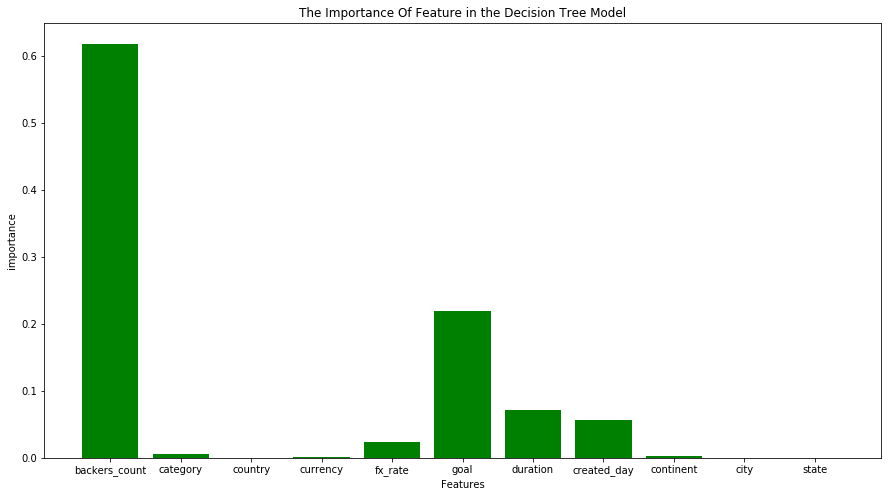

In [42]:
fig =plt.figure(figsize=(15,8))
ax =plt.axes()
ax.bar(X_train.columns, dct.feature_importances_, color ='g')
ax.set_xlabel('Features')
ax.set_ylabel('importance')
ax.set_title('The Importance Of Feature in the Decision Tree Model')

Text(0.5, 1.0, 'The Importance Of Feature in the Decision Tree Model')

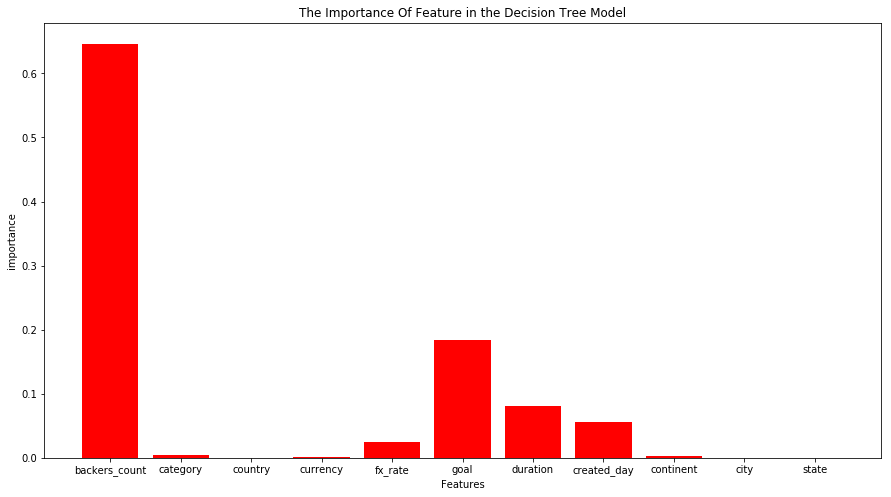

In [43]:
fig =plt.figure(figsize=(15,8))
ax =plt.axes()
ax.bar(X_train.columns, rf.feature_importances_, color ='r')
ax.set_xlabel('Features')
ax.set_ylabel('importance')
ax.set_title('The Importance Of Feature in the Decision Tree Model')

In [343]:
from sklearn.metrics import confusion_matrix,roc_curve,f1_score,auc,precision_score,recall_score

In [344]:
print('Random Forest', confusion_matrix(y_test, rfpre))

Random Forest [[7803  641]
 [ 543 8060]]


In [345]:
print('Decision Tree', confusion_matrix(y_test, dctpre))

Decision Tree [[7616  828]
 [ 829 7774]]


In [346]:
fpr_rf,tpr_rf,  thrsholds_rf =roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
fpr_dct, tpr_dct, thrshold_dct =roc_curve(y_test, dct.predict_proba(X_test)[:, 1])

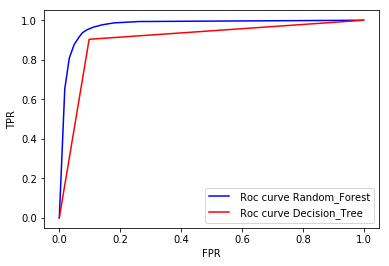

In [347]:
plt.plot(fpr_rf, tpr_rf, label =' Roc curve Random_Forest', color ='b')
plt.plot(fpr_dct, tpr_dct, label =' Roc curve Decision_Tree', color ='r')
plt.xlabel('FPR')
plt.ylabel('TPR')
# plt.plot(fpr[close_zero], tpr[close_zero], 'o', marksize =10, label ='thrshold zero rf', fillstyle = 'none', c ='k', mew =2)
plt.legend(loc =4)

In [348]:
print('auc of decision_tree:', auc(fpr_dct, tpr_dct))
print('auc of random_forest:',auc(fpr_rf, tpr_rf))

auc of decision_tree: 0.9027902366029322
auc of random_forest: 0.972394335412173


In [310]:
#计算Random Forest的f1分数, 虽然准确率和召回率是非常重要的度量，但是二者仅考察二者之一无法提供完整的图景， f1分数是二者的调和平均汇总
# print('f1 score of RF:', f1_score(y_test, rfpre))

In [311]:
# print('f1 score of dt:', f1_score(y_test, dctpre))

In [312]:
rf_precison=precision_score(y_test, rfpre)
rf_recall =recall_score(y_test, rfpre)
rf_f1 =f1_score(y_test, rfpre)
print('rf precision:',rf_precison)
print('rf recall:', rf_recall)
print('rf f1:', rf_f1)

rf precision: 0.9330662876340613
rf recall: 0.8393583633616181
rf f1: 0.8837351609350141


In [313]:
dt_precision =precision_score(y_test, dctpre)
dt_recall =recall_score(y_test, dctpre)
dt_f1 = f1_score(y_test, dctpre)
print('dt precision:', dt_precision)
print('dt recall:', dt_recall)
print('dt f1:', dt_f1)

dt precision: 0.900425434057721
dt recall: 0.9102638614436824
dt f1: 0.9053179190751446
